In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame
print(df)

<class 'pandas.core.frame.DataFrame'>


In [2]:
# Set visualizations to appear in the notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
# set seaborn style
sns.set(style='whitegrid')

In [91]:
# # Loading the Dataset:

# ### Loading the Titanic Dataset
# the Titanic dataset is available in the Seaborn library's built-in dataset. Let's load and explore it
#Load the dataset using pandas 
dataset = pd.read_csv('titanic.csv')

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [6]:
# Show the first five row of the dataset
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# # Dataset Overview:

# ### Initial Exploration of the Data
# take a look at the structure of the dataset and understand th columns, datatypes, and any missing values

# General information about the dataset
dataset.info()

NameError: name 'dataset' is not defined

In [4]:
# Statistical summary of the dataset
dataset.describe()


NameError: name 'dataset' is not defined

In [121]:
dataset['Cabin'].fillna(dataset['Cabin'].mode())

KeyError: 'Cabin'

In [9]:
# Checking for missing values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
# Fill missing values in 'Embarked' with the most common port
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [115]:
# # Data Cleaning:

# ### Data Cleaning
# handle missing values in the dataset by imputing or dropping them as appropriate

# Fill missing values in 'Age' with the median

dataset['Age'].fillna(dataset['Age'].mode())



0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [116]:
# Drop the 'Cabin' columns it has many missing values
dataset.drop('Cabin', axis=1, inplace=True)


KeyError: 'Cabin'

In [118]:
# Check after Cleaning
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [64]:
# Create a new column 'Is_Child'
dataset['Is_Child'] = np.where(dataset['Age'] < 18, 1, 0)

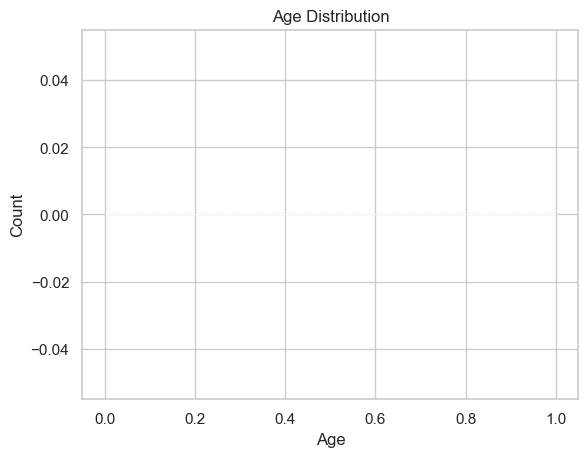

In [65]:
# ### Univariate Analysis
# analyze individual columns to understand the variables like age, fare, and survival.
# Age distribution
sns.histplot(dataset['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

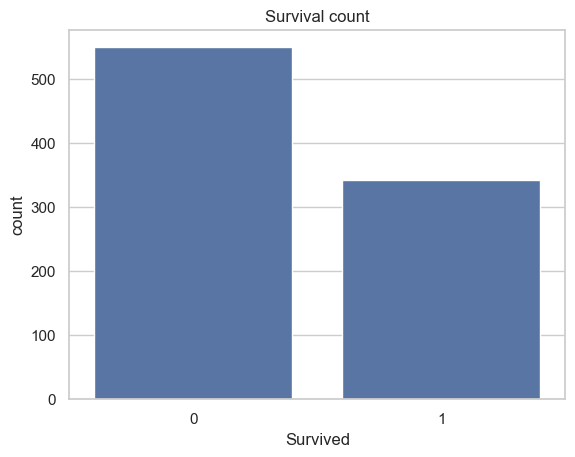

In [66]:
# Survival Countplot
sns.countplot(x='Survived', data=dataset)
plt.title('Survival count')
plt.show()

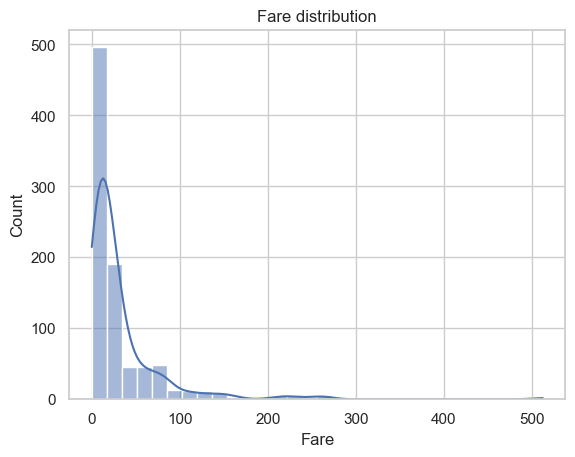

In [67]:
# Fare distribution
sns.histplot(dataset['Fare'], bins=30, kde=True)
plt.title('Fare distribution')
plt.show()

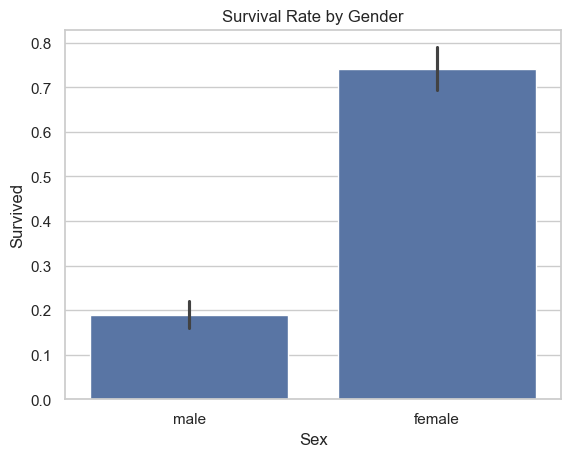

In [68]:
# ### Bivariate Analysis
# explore relationships between two variables , such as servival rate by gender,cchidern/adults and passenger class.
# Survival rate by gander
sns.barplot(x='Sex', y='Survived', data=dataset)
plt.title('Survival Rate by Gender')
plt.show()


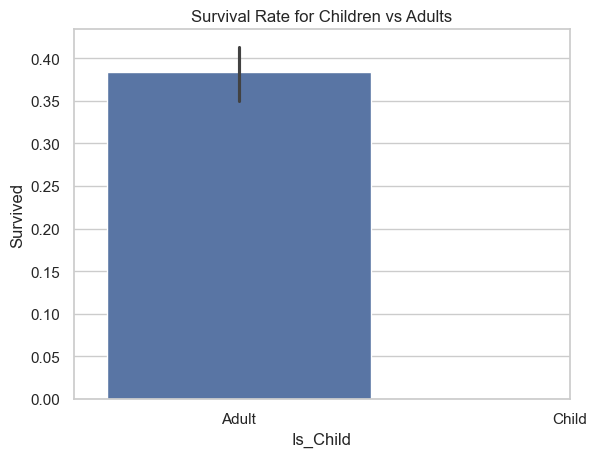

In [69]:
# Bar plot showing survival rate by whether passenger is a child or not
sns.barplot(x='Is_Child', y='Survived', data=dataset)
plt.title('Survival Rate for Children vs Adults')
plt.xticks([0, 1], ['Adult', 'Child'])
plt.show()

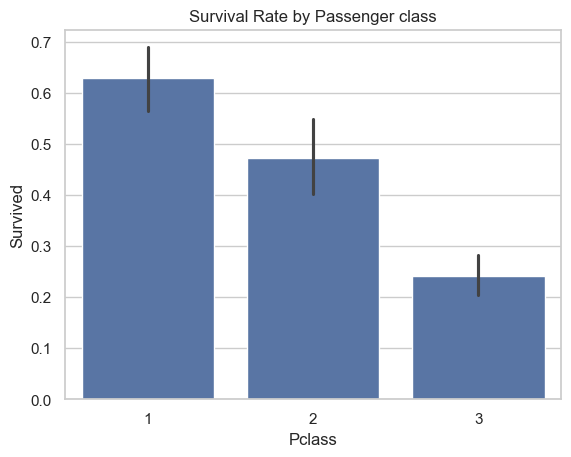

In [70]:
# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=dataset)
plt.title('Survival Rate by Passenger class')
plt.show()

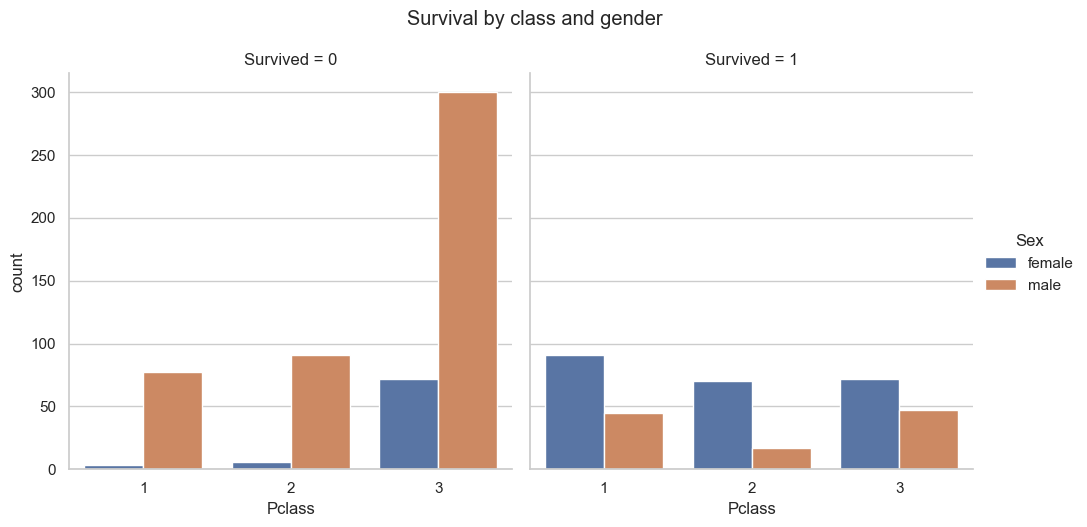

In [71]:
# ### Multivariate Analysis
# Multivariate analysis involves exploring more complex relatonships between multiple variables.Here we will analyze survival by class and gender, as well as the relationship between fare and age.
# Survival rate by class and gender
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=dataset , kind='count')
plt.suptitle('Survival by class and gender', y=1.05)
plt.show()

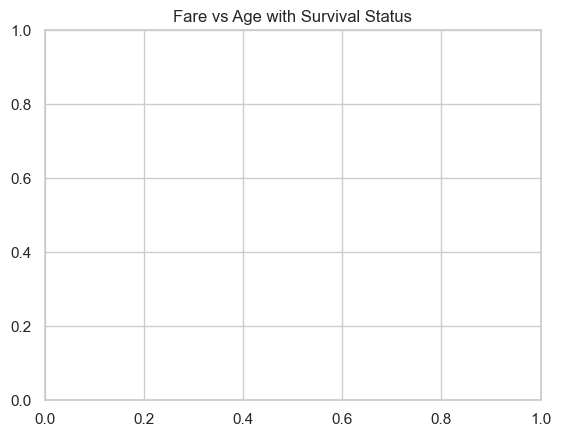

In [72]:
# Scatter plot for age vs fare with survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=dataset)
plt.title('Fare vs Age with Survival Status')
plt.show()


In [73]:
# # 8. Correlation Matrix
# A heatmap of the correlation between numerical variables can help us understand the strength of relationships between features.
# Select only numeric columns from the dataset
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])


In [74]:
# Correlation matrix for numerical columns
corr_matrix = numeric_dataset.corr()

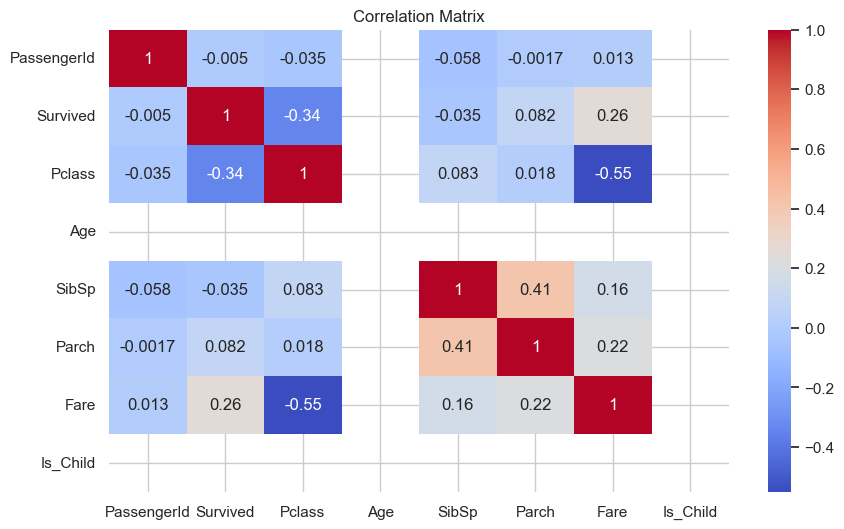

In [55]:
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()